Podemos fazer gráficos usando o `f2py`!

In [7]:
import numpy as np
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

Usando a magic de fortran [(link)](https://github.com/mgaitan/fortran_magic), temos:

In [8]:
%load_ext fortranmagic

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


In [9]:
%%fortran

subroutine estimate_coef(x, y, b)

  real, intent(in) :: x(:), y(:)
  real, intent(out) :: b(2)
  real :: m_x, m_y
  integer :: n

  ! number of observations/points
  n = size(x)

  ! mean of x and y vector
  m_x = sum(x)/n 
  m_y = sum(y)/n

  ! calculating cross-deviation and deviation about x
  SS_xy = sum(y*x) - n*m_y*m_x
  SS_xx = sum(x*x) - n*m_x*m_x 
  
  ! calculating regression coefficients 
  b(2) = SS_xy / SS_xx 
  b(1) = m_y - b(2)*m_x 

  return
  
end subroutine estimate_coef

In [10]:
b = estimate_coef(x, y)

In [11]:
import matplotlib.pyplot as plt

def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 

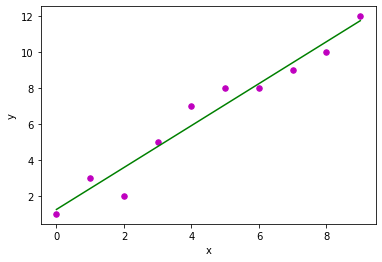

In [12]:
plot_regression_line(x,y,b)